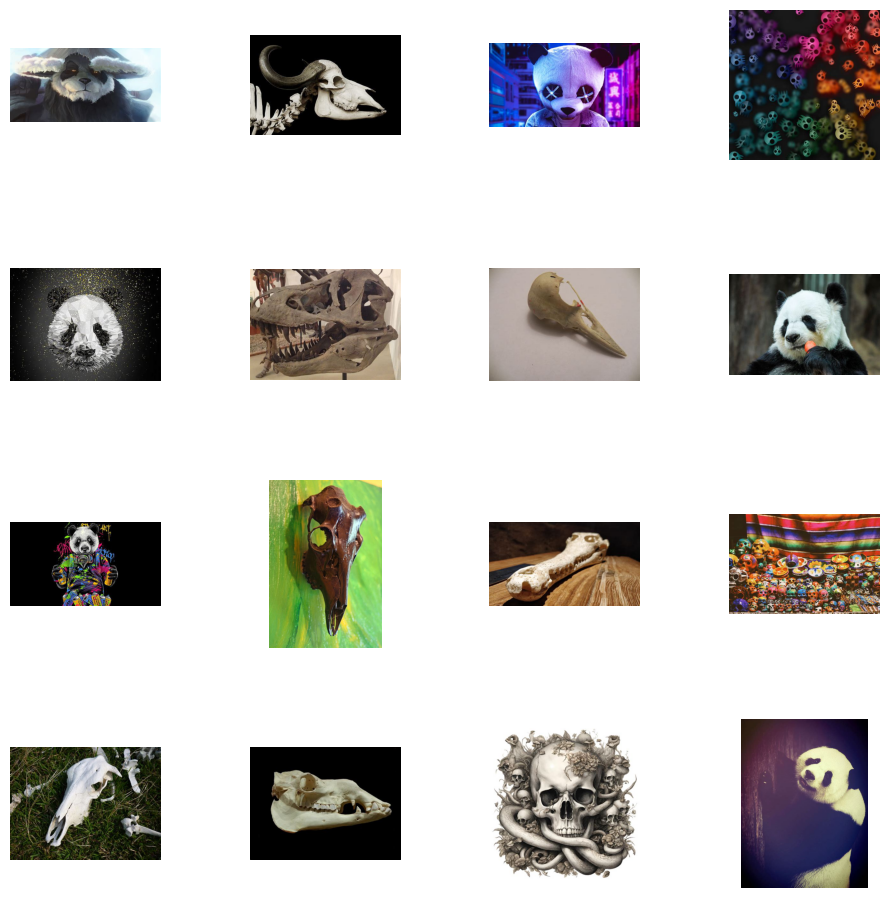

In [6]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace with your Bing API subscription key
subscription_key = "e5a0260c7437442b853327d940423691"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
search_term = "skull panda"  # Change this to test with other search terms

headers = {"Ocp-Apim-Subscription-Key": subscription_key}
params = {
    "q": search_term,  # Search term
    "license": "public",  # Publicly licensed images
    "imageType": "photo"  # Image type as photo
}

try:
    # Perform the Bing Image Search API call
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
    search_results = response.json()

    # Extract thumbnail URLs from the search results
    thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

    # Prepare a 4x4 grid to display the images
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.tight_layout(pad=3.0)

    # Iterate through the thumbnails and display them in the grid
    for i in range(4):
        for j in range(4):
            try:
                # Fetch and display the image
                image_data = requests.get(thumbnail_urls[i + 4 * j])
                image_data.raise_for_status()
                image = Image.open(BytesIO(image_data.content))
                axes[i][j].imshow(image)
                axes[i][j].axis("off")
            except Exception as e:
                print(f"[ERROR] Unable to fetch image {i + 4 * j}: {e}")

    # Show the images
    plt.show()

except Exception as e:
    print(f"[ERROR] An error occurred: {e}")


In [15]:
!pip install azure
!pip install azure-ai-vision
!pip install azure-storage-blob

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [25 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\zikan\AppData\Local\Temp\pip-install-zec7nrci\azure_f43eaf61dfd4445ebbe66d631b8403a5\setup.py", line 60, in <module>
      raise RuntimeError(message)
  RuntimeError:
  
  Starting with v5.0.0, the 'azure' meta-package is deprecated and cannot be installed anymore.
  Please install the service specific packages prefixed by `azure` needed for your application.
  
  The complete list of available packages can be found at:
  https://aka.ms/azsdk/python/all
  
  Here's a non-exhaustive list of common packages:
  
  -  azure-mgmt-compute (https://pypi.python.org/pypi/azure-mgmt-compute) : Management of Virtual Machines, etc.
  -  azure-mgmt-storage (https://pypi.python.org/pypi/azure-mgmt-storage) : Managem

  Obtaining dependency information for azure-storage-blob from https://files.pythonhosted.org/packages/e2/f8/ef0f76f8c424bedd20c685409836ddfb42ac76fd8a0f21c3c3659cf7207d/azure_storage_blob-12.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for azure-core>=1.30.0 from https://files.pythonhosted.org/packages/39/83/325bf5e02504dbd8b4faa98197a44cdf8a325ef259b48326a2b6f17f8383/azure_core-1.32.0-py3-none-any.whl.metadata
  Obtaining dependency information for isodate>=0.6.1 from https://files.pythonhosted.org/packages/15/aa/0aca39a37d3c7eb941ba736ede56d689e7be91cab5d9ca846bde3999eba6/isodate-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/408.6 kB ? eta -:--:--
   ------------------------------ --------- 307.2/408.6 kB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 408.6/408.6 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   --------------------------------------- 198.9/198.9 

In [16]:
import http.client, urllib.parse
import json
import os.path
from azure.cognitiveservices.search.visualsearch import VisualSearchClient
from azure.cognitiveservices.search.visualsearch.models import (
    VisualSearchRequest,
    CropArea,
    ImageInfo,
    Filters,
    KnowledgeRequest,
)
from msrest.authentication import CognitiveServicesCredentials

subscription_key = 'e5a0260c7437442b853327d940423691'
PATH = "C:\\Users\\zikan\\Downloads\\"
image_path = os.path.join(PATH, "Discord_Black_Icon.png")

client = VisualSearchClient(endpoint="https://api.bing.microsoft.com", credentials=CognitiveServicesCredentials(subscription_key))

with open(image_path, "rb") as image_fd:
    # You need to pass the serialized form of the model
    knowledge_request = json.dumps(VisualSearchRequest().serialize())

    print("\r\nSearch visual search request with binary of dog image")
    result = client.images.visual_search(image=image_fd, knowledge_request=knowledge_request)
    
    if not result:
        print("No visual search result data.")

        # Visual Search results
    if result.image.image_insights_token:
        print("Uploaded image insights token: {}".format(result.image.image_insights_token))
    else:
        print("Couldn't find image insights token!")

    # List of tags
    if result.tags:
        first_tag = result.tags[0]
        print("Visual search tag count: {}".format(len(result.tags)))

        # List of actions in first tag
        if first_tag.actions:
            first_tag_action = first_tag.actions[0]
            print("First tag action count: {}".format(len(first_tag.actions)))
            print("First tag action type: {}".format(first_tag_action.action_type))
        else:
            print("Couldn't find tag actions!")
    else:
        print("Couldn't find image tags!")

ModuleNotFoundError: No module named 'azure.cognitiveservices'

In [33]:
import requests
import os
import json

# Bing Visual Search API Configuration
BING_API_KEY = "e5a0260c7437442b853327d940423691"  # Replace with your Bing API key
BING_ENDPOINT = "https://api.bing.microsoft.com/v7.0/images/visualsearch"

def search_image(image_path):
    """
    Perform a visual search using Bing Visual Search API.

    Args:
        image_path (str): Path to the image file to search.
    Returns:
        dict: Parsed JSON response from the Bing API.
    """
    if not os.path.exists(image_path):
        print("[ERROR] Image file does not exist.")
        return None

    try:
        with open(image_path, "rb") as img:
            headers = {"Ocp-Apim-Subscription-Key": BING_API_KEY}
            files = {"image": img}
            response = requests.post(BING_ENDPOINT, headers=headers, files=files)
            response.raise_for_status()  # Raise HTTPError for bad responses
            return response.json()
    except requests.exceptions.RequestException as e:
        print("[ERROR] An error occurred while making the API request:", e)
        return None

def extract_product_titles(response):
    """
    Extract product titles and related information from the Bing Visual Search API response.

    Args:
        response (dict): Parsed JSON response from Bing API.
    Returns:
        list: List of dictionaries containing product information.
    """
    print("\n[DEBUG] Full API Response:")
    print(json.dumps(response, indent=4))  # Print the full response for debugging

    products = []
    if "tags" in response:
        for tag in response["tags"]:
            for action in tag.get("actions", []):
                if action.get("data"):
                    for value_item in action["data"].get("value", []):
                        product_name = value_item.get("name", "Unknown Title")
                        redirect_url = value_item.get("webSearchUrl", "")
                        
                        if product_name.strip():  # Ensure the product has a meaningful name
                            products.append({
                                "title": product_name,
                                "redirect_url": redirect_url,
                                "image_url": value_item.get("thumbnailUrl", "No Image URL")
                            })
    return products


def main():
    # Path to the image file
    image_path = "C:/Users/zikan/Documents/FYP2-Backend/media/images/photo_SHbZvqD.jpg"  # Replace with the path to your image file

    print("[INFO] Starting Bing Visual Search...")
    response = search_image(image_path)

    if not response:
        print("[ERROR] No response from Bing Visual Search API.")
        return

    print("[INFO] Extracting product titles...")
    products = extract_product_titles(response)

    if products:
        print("\n[INFO] Detected Products:")
        for idx, product in enumerate(products, 1):
            print(f"{idx}. Title: {product['title']}")
            print(f"   Redirect URL: {product['redirect_url']}")
            print(f"   Image URL: {product['image_url']}")
            print("-" * 40)
    else:
        print("[INFO] No products detected.")

if __name__ == "__main__":
    main()


[INFO] Starting Bing Visual Search...
[ERROR] An error occurred while making the API request: 400 Client Error: Bad Request for url: https://api.bing.microsoft.com/v7.0/images/visualsearch
[ERROR] No response from Bing Visual Search API.
